# **Importing Libraries**

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing Dataset**



In [116]:
path = '/content/drive/MyDrive/Colab Notebooks/nn/IRIS.csv'
dataset = pd.read_csv(path)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Considering Two Features for Better Visualization**

In [117]:
dataset = dataset.drop(columns=['sepal_width', 'petal_width'])
dataset.head()

,sepal_length,petal_length,species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [118]:
dataset.shape

(150, 3)

# **Handling Missing and Duplicate Values in data**

In [119]:
dataset.isnull().sum()

,0
sepal_length,0
petal_length,0
species,0


In [120]:
dataset.duplicated().sum()

26

In [121]:
duplicates = dataset[dataset.duplicated()]
print(duplicates)

     sepal_length  petal_length          species
17            5.1           1.4      Iris-setosa
20            5.4           1.7      Iris-setosa
21            5.1           1.5      Iris-setosa
26            5.0           1.6      Iris-setosa
30            4.8           1.6      Iris-setosa
31            5.4           1.5      Iris-setosa
32            5.2           1.5      Iris-setosa
34            4.9           1.5      Iris-setosa
37            4.9           1.5      Iris-setosa
39            5.1           1.5      Iris-setosa
42            4.4           1.3      Iris-setosa
43            5.0           1.6      Iris-setosa
45            4.8           1.4      Iris-setosa
47            4.6           1.4      Iris-setosa
49            5.0           1.4      Iris-setosa
73            6.1           4.7  Iris-versicolor
85            6.0           4.5  Iris-versicolor
89            5.5           4.0  Iris-versicolor
96            5.7           4.2  Iris-versicolor
114           5.8   

In [122]:
duplicates = dataset[dataset.duplicated(keep=False)]
print(duplicates)

     sepal_length  petal_length          species
0             5.1           1.4      Iris-setosa
4             5.0           1.4      Iris-setosa
5             5.4           1.7      Iris-setosa
6             4.6           1.4      Iris-setosa
9             4.9           1.5      Iris-setosa
10            5.4           1.5      Iris-setosa
11            4.8           1.6      Iris-setosa
12            4.8           1.4      Iris-setosa
17            5.1           1.4      Iris-setosa
19            5.1           1.5      Iris-setosa
20            5.4           1.7      Iris-setosa
21            5.1           1.5      Iris-setosa
25            5.0           1.6      Iris-setosa
26            5.0           1.6      Iris-setosa
27            5.2           1.5      Iris-setosa
30            4.8           1.6      Iris-setosa
31            5.4           1.5      Iris-setosa
32            5.2           1.5      Iris-setosa
34            4.9           1.5      Iris-setosa
37            4.9   

In [123]:
dataset.drop_duplicates(keep='first', inplace=True)

In [124]:
dataset.duplicated().sum()

0

# **Extracting Features and Label**

In [125]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# **Encoding**

## 1. Label Encoding

In [126]:
labels, y_encoded = np.unique(y, return_inverse=True)
labels, y_encoded.shape, y_encoded[:3]

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 (124,),
 array([0, 0, 0]))

## 2. One Hot Encoding

In [127]:
y_one_hot = np.eye(len(labels))[y_encoded]
y_one_hot.shape, y_one_hot[:3]

((124, 3),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

# **Scatter Plotting of Features**

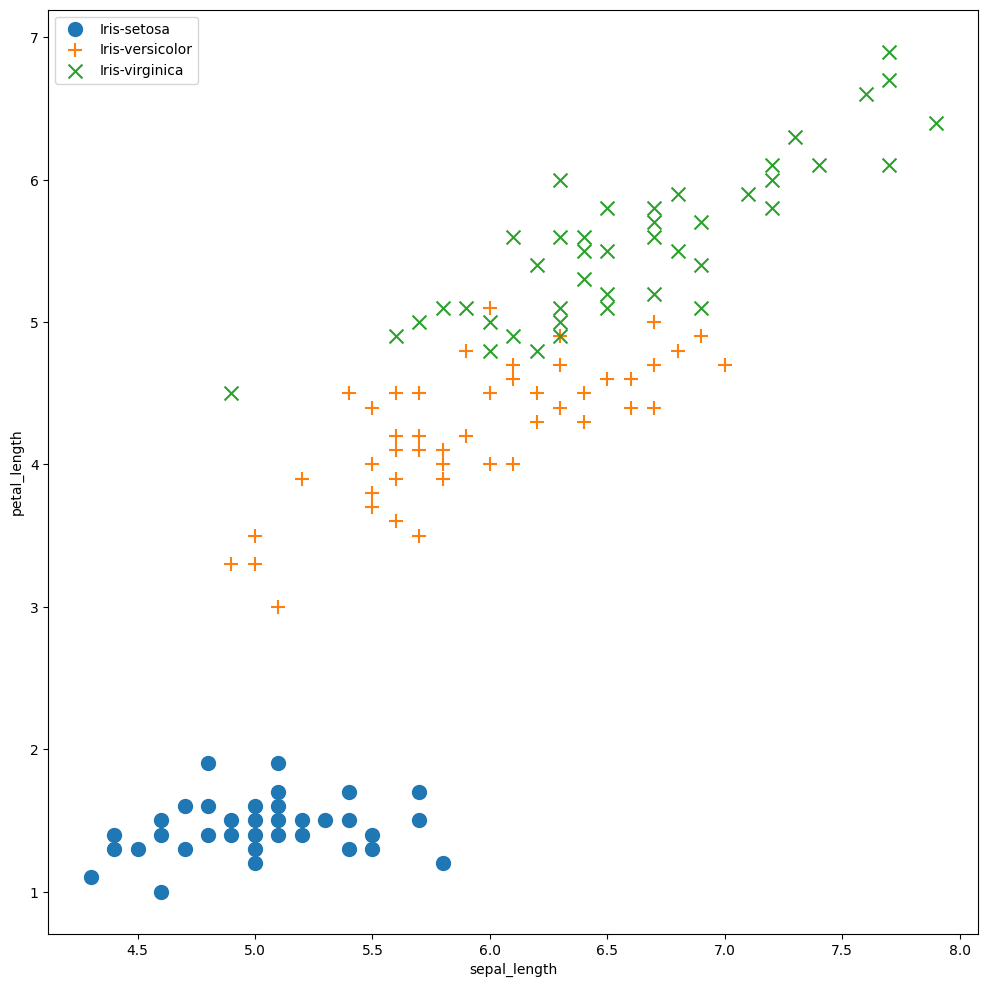

In [128]:
markers = ['o', '+', 'x']
plt.figure(figsize=(12, 12))

for label, marker in zip(np.unique(y_encoded), markers):
  plt.scatter(X[y_encoded == label, 0], X[y_encoded == label, 1], label=labels[label], marker=marker, s=100)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

# **Splitting the Data**

In [129]:
# Shuffles the data by generating random indices
indices = np.random.permutation(len(X))

# Defines the split ratio (80% train, 20% test)
split_ratio = 0.8
train_size = int(len(X) * split_ratio)

# Splits the indices into training and test sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y_one_hot[train_indices]
y_test = y_one_hot[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (99, 2)
X_test shape: (25, 2)
y_train shape: (99, 3)
y_test shape: (25, 3)


# **Neural Network Class**

In [130]:
class NeuralNetwork:
    def __init__(self):
        # Defines the number of neurons in each layer
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 4
        hiddenLayer2Neurons = 4
        hiddenLayer3Neurons = 4
        outputLayerNeurons = 3

        # Learning rate
        self.learning_rate = 0.0001

        # Weights for the layers
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

        # Biases for the layers
        self.b_H1 = np.random.randn(1, hiddenLayer1Neurons)
        self.b_H2 = np.random.randn(1, hiddenLayer2Neurons)
        self.b_H3 = np.random.randn(1, hiddenLayer3Neurons)
        self.b_O = np.random.randn(1, outputLayerNeurons)

    def relu(self, x, der=False):
        if der:
            return np.where(x > 0, 1, 0)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Layer 1
        self.hidden_input1 = np.dot(X, self.W_H1) + self.b_H1
        self.hidden_output1 = self.relu(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.b_H2
        self.hidden_output2 = self.relu(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.b_H3
        self.hidden_output3 = self.relu(self.hidden_input3)

        # Output layer
        self.output_input = np.dot(self.hidden_output3, self.W_O) + self.b_O
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = output_error

        # Hidden layer 3 error and delta
        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.relu(self.hidden_input3, der=True)

        # Hidden layer 2 error and delta
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.relu(self.hidden_input2, der=True)

        # Hidden layer 1 error and delta
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.relu(self.hidden_input1, der=True)

        # Updates weights and biases
        self.W_O += self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.b_O += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.W_H3 += self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.b_H3 += self.learning_rate * np.sum(hidden_delta3, axis=0, keepdims=True)

        self.W_H2 += self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.b_H2 += self.learning_rate * np.sum(hidden_delta2, axis=0, keepdims=True)

        self.W_H1 += self.learning_rate * X.T.dot(hidden_delta1)
        self.b_H1 += self.learning_rate * np.sum(hidden_delta1, axis=0, keepdims=True)

    def train(self, X, Y):
        # Forward pass
        output = self.feedForward(X)

        # Backward pass
        self.backPropagation(X, Y, output)

# **Functions for Accuracy and Loss Calculation**

## Categorical Cross Entropy

In [131]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)  # Prevent log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

## Accuracy

In [132]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

# **Training the Model**

In [133]:
# Training
NN = NeuralNetwork()
epochs = 10000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train, y_train)
    y_pred = NN.feedForward(X_train)
    err.append(categorical_cross_entropy(y_train, y_pred))
    acc.append(accuracy(y_train, y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {err[epoch]:.4f}, Accuracy: {acc[epoch]:.4f}")

Epoch 0/10000 - Loss: 6.9232, Accuracy: 0.6364
Epoch 100/10000 - Loss: 0.6551, Accuracy: 0.9293
Epoch 200/10000 - Loss: 0.4497, Accuracy: 0.9495
Epoch 300/10000 - Loss: 0.3174, Accuracy: 0.9596
Epoch 400/10000 - Loss: 0.2438, Accuracy: 0.9596
Epoch 500/10000 - Loss: 0.2041, Accuracy: 0.9495
Epoch 600/10000 - Loss: 0.1814, Accuracy: 0.9495
Epoch 700/10000 - Loss: 0.1676, Accuracy: 0.9495
Epoch 800/10000 - Loss: 0.1586, Accuracy: 0.9495
Epoch 900/10000 - Loss: 0.1523, Accuracy: 0.9495
Epoch 1000/10000 - Loss: 0.1477, Accuracy: 0.9495
Epoch 1100/10000 - Loss: 0.1441, Accuracy: 0.9495
Epoch 1200/10000 - Loss: 0.1413, Accuracy: 0.9495
Epoch 1300/10000 - Loss: 0.1389, Accuracy: 0.9495
Epoch 1400/10000 - Loss: 0.1369, Accuracy: 0.9495
Epoch 1500/10000 - Loss: 0.1352, Accuracy: 0.9495
Epoch 1600/10000 - Loss: 0.1337, Accuracy: 0.9495
Epoch 1700/10000 - Loss: 0.1323, Accuracy: 0.9495
Epoch 1800/10000 - Loss: 0.1311, Accuracy: 0.9495
Epoch 1900/10000 - Loss: 0.1299, Accuracy: 0.9495
Epoch 2000/1

# **Plotting Training Loss and Accuracy**

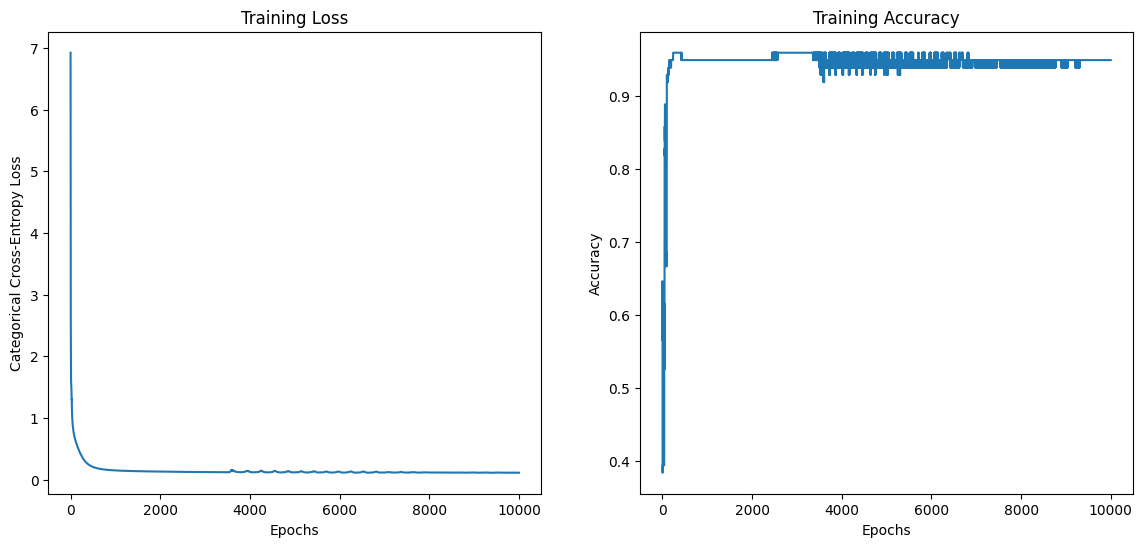

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the error
ax[0].plot(err)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Cross-Entropy Loss')
ax[0].set_title('Training Loss')

# Plot the accuracy
ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()

# **Evaluating Model on Test Data**

In [135]:
y_test_pred = NN.feedForward(X_test)

test_loss = categorical_cross_entropy(y_test, y_test_pred)
test_accuracy = accuracy(y_test, y_test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.0865
Test Accuracy: 96.00%


# **Plotting Decision Boundaries**

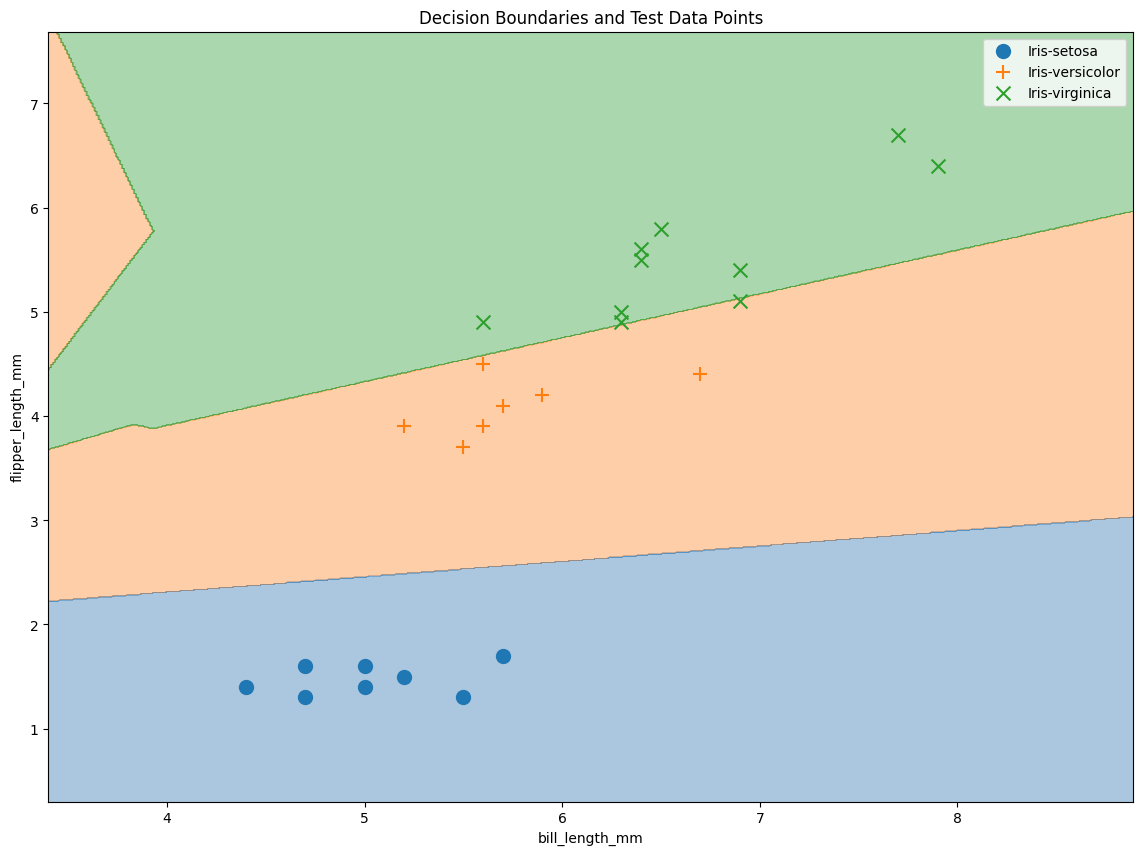

In [136]:
from matplotlib.colors import ListedColormap

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Define a mesh grid
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict over the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_pred = NN.feedForward(grid_points)
grid_pred_classes = np.argmax(grid_pred, axis=1)

# Plot the decision boundary
plt.figure(figsize=(14, 10))
cmap = ListedColormap(['#2b75b1', '#fd8529', '#2f9d35'])
plt.contourf(xx, yy, grid_pred_classes.reshape(xx.shape), alpha=0.4, cmap=cmap)

for label, marker in zip(np.unique(y_test_labels), markers):
    plt.scatter(X_test[y_test_labels == label, 0],
                X_test[y_test_labels == label, 1],
                label=labels[label],
                marker=marker,
                s=100)

plt.xlabel("bill_length_mm")
plt.ylabel("flipper_length_mm")
plt.legend()
plt.title("Decision Boundaries and Test Data Points")
plt.show()